# Actividad 2
Juan Francisco García Rodríguez
A01660981

In [61]:
import sys

In [62]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2

Importar imagen y conversión BGR->RGB

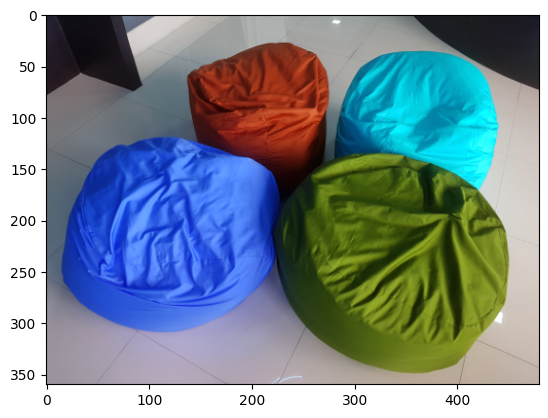

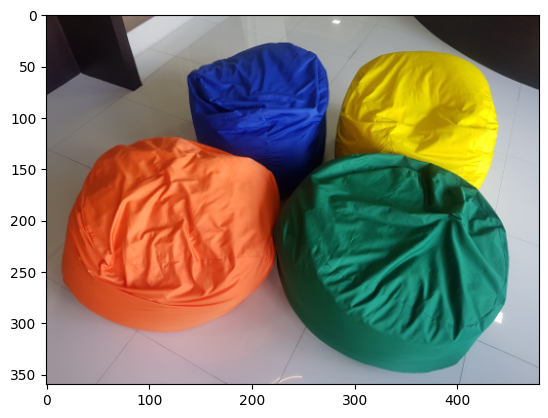

In [63]:
img = cv2.imread('bags.png')
plt.imshow(img)
plt.show()
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Método de la gráfica scatter en RGB o HSV 

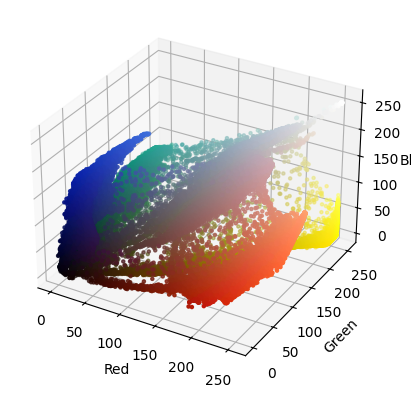

In [64]:
r, g, b = cv2.split(img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection = "3d")
pixel_colors = img.reshape((np. shape(img)[0] * np.shape(img)[1], 3))
norm = colors.Normalize(vmin=-1., vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors = pixel_colors, marker = ".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

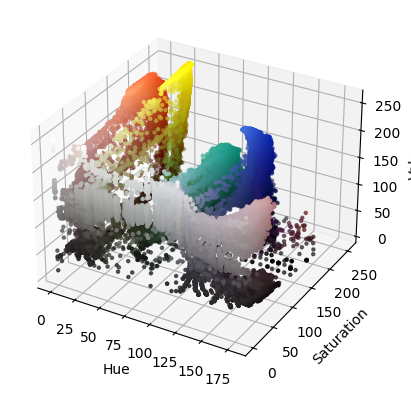

In [65]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
h, s, v = cv2.split(hsv_img)
fig = plt.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

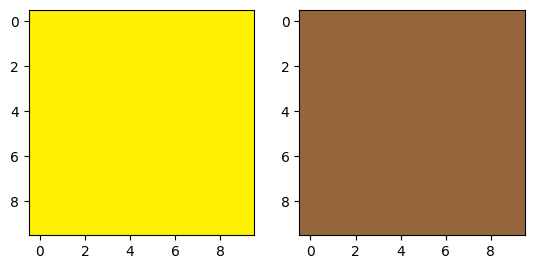

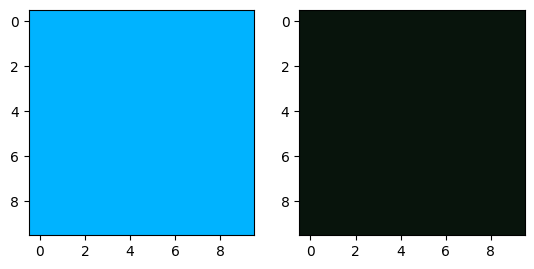

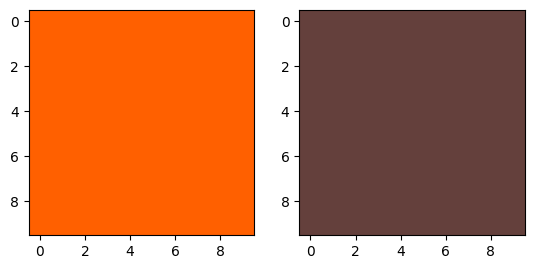

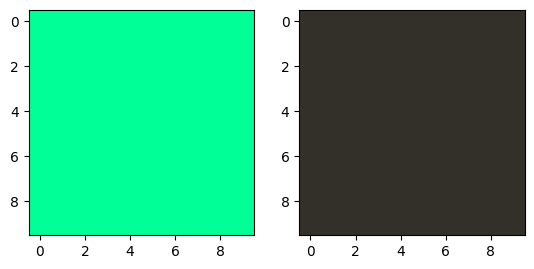

In [66]:
color_ranges = {
    'blue_bag': ((100, 150, 20), (140, 255, 255)),
    'yellow_bag': ((20, 150, 150), (40, 255, 255)),
    'orange_bag': ((4, 100, 100), (16, 255, 255)),
    'green_bag': ((35, 50, 50), (110, 255, 255))
}

yellow_bag_range = color_ranges['yellow_bag']
blue_bag_range = color_ranges['blue_bag']
orange_bag_range = color_ranges['orange_bag']
green_bag_range = color_ranges['green_bag']

from matplotlib.colors import hsv_to_rgb
lo_square_yellow = np.full((10, 10, 3), yellow_bag_range[1], dtype=np.uint8) / 255.0
do_square_yellow = np.full((10, 10, 3), yellow_bag_range[0], dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square_yellow))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square_yellow))
plt.show()

lo_square_blue = np.full((10, 10, 3), blue_bag_range[1], dtype=np.uint8) / 255.0
do_square_blue = np.full((10, 10, 3), blue_bag_range[0], dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square_blue))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square_blue))
plt.show()

lo_square_orange = np.full((10, 10, 3), orange_bag_range[1], dtype=np.uint8) / 255.0
do_square_orange = np.full((10, 10, 3), orange_bag_range[0], dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square_orange))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square_orange))
plt.show()

lo_square_green = np.full((10, 10, 3), green_bag_range[1], dtype=np.uint8) / 255.0
do_square_green = np.full((10, 10, 3), green_bag_range[0], dtype=np.uint8) / 255.0
plt.subplot(1, 2, 1)
plt.imshow(hsv_to_rgb(lo_square_green))
plt.subplot(1, 2, 2)
plt.imshow(hsv_to_rgb(do_square_green))
plt.show()

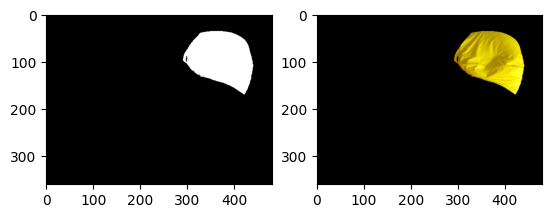

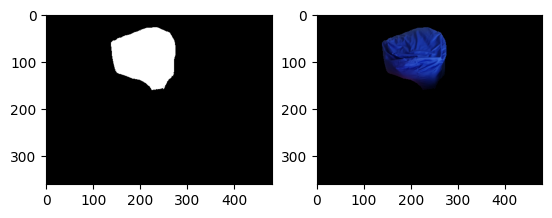

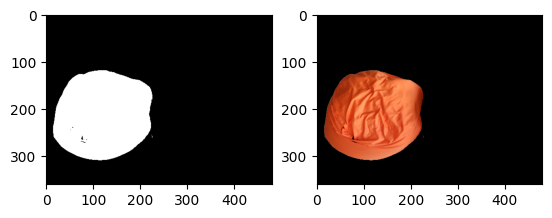

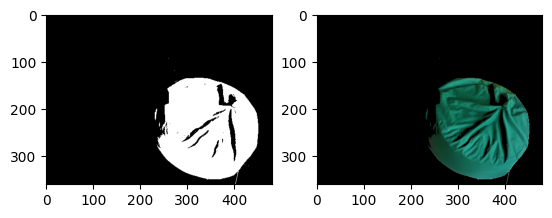

In [67]:
# Yellow
mask_yellow = cv2.inRange(hsv_img, yellow_bag_range[0], yellow_bag_range[1])
result_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)
plt.subplot(1, 2, 1)
plt.imshow(mask_yellow, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_yellow)
plt.show()

# Blue
mask_blue = cv2.inRange(hsv_img, blue_bag_range[0], blue_bag_range[1])
result_blue = cv2.bitwise_and(img, img, mask=mask_blue)
plt.subplot(1, 2, 1)
plt.imshow(mask_blue, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_blue)
plt.show()

# Orange
mask_orange = cv2.inRange(hsv_img, orange_bag_range[0], orange_bag_range[1])
result_orange = cv2.bitwise_and(img, img, mask=mask_orange)
plt.subplot(1, 2, 1)
plt.imshow(mask_orange, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_orange)
plt.show()

# Green
mask_green = cv2.inRange(hsv_img, green_bag_range[0], green_bag_range[1])
result_green = cv2.bitwise_and(img, img, mask=mask_green)
plt.subplot(1, 2, 1)
plt.imshow(mask_green, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result_green)
plt.show()

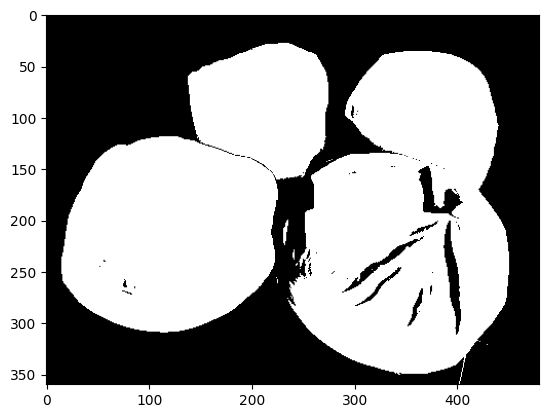

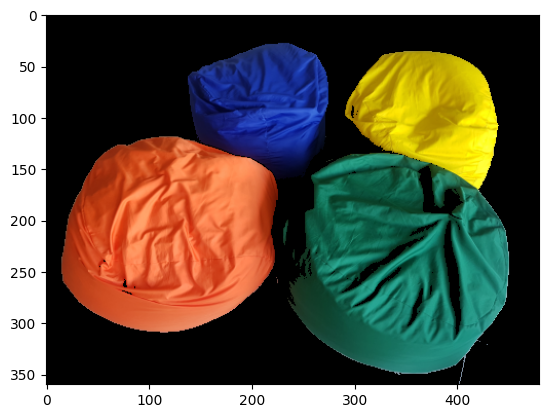

In [68]:
# All bags
mask_all = cv2.add(mask_yellow, mask_blue)
mask_all = cv2.add(mask_all, mask_orange)
mask_all = cv2.add(mask_all, mask_green)

result_all = cv2.bitwise_and(img, img, mask=mask_all)

plt.imshow(mask_all, cmap="gray")
plt.show()
plt.imshow(result_all)
plt.show()

Método de color bar HSV

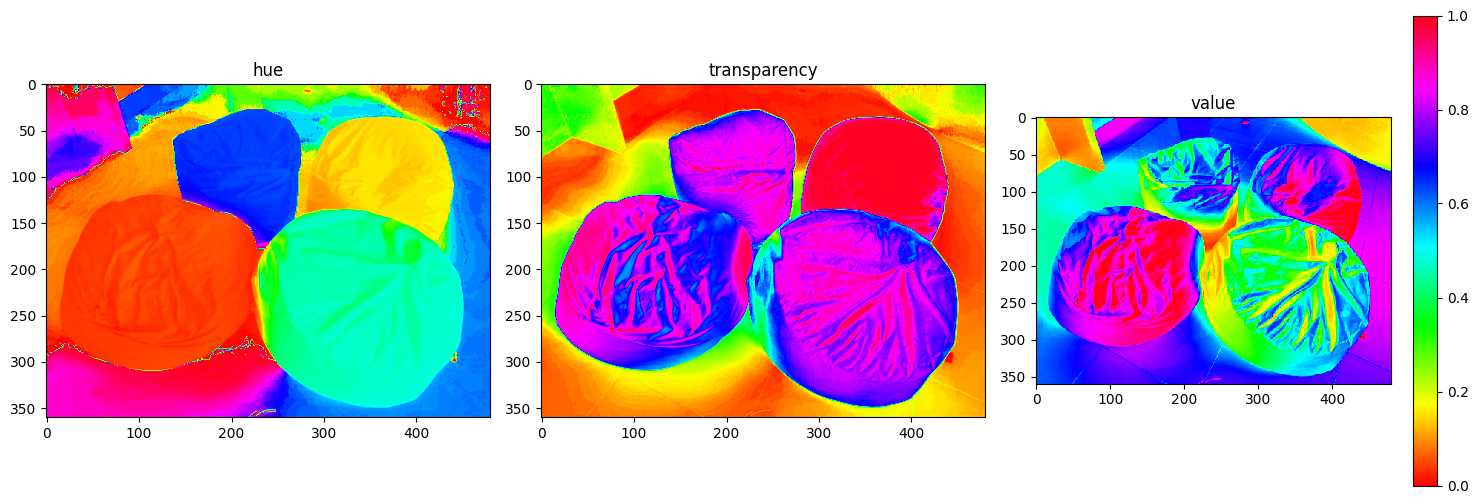

In [69]:
from skimage.io import imread, imshow
from skimage.color import rgb2hsv
hsv_img = rgb2hsv(img)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(hsv_img[:,:,0], cmap='hsv')
ax[0].set_title('hue')
ax[1].imshow(hsv_img[:,:,1], cmap='hsv')
ax[1].set_title('transparency')
ax[2].imshow(hsv_img[:,:,2], cmap='hsv')
ax[2].set_title('value')
fig.colorbar(imshow(hsv_img[:,:,2], cmap='hsv'))
#fig.tight_layout()
plt.show()

In [70]:
hsv_img = rgb2hsv(img)

# Yellow
lower_mask_yellow  = hsv_img[:,:,0] > 0.07 # Refer to hue channel (in the colorbar)
upper_mask_yellow = hsv_img[:,:,0] < 0.2 # Refer to hue channel (in the colorbar)
saturation_mask_yellow = hsv_img[:,:,1] > 0.65 # Refer to transparency channel (in the colorbar)

# Blue
lower_mask_blue  = hsv_img[:,:,0] > 0.5
upper_mask_blue = hsv_img[:,:,0] < 0.75
saturation_mask_blue = hsv_img[:,:,1] > 0.55

# Orange
lower_mask_orange  = hsv_img[:,:,0] > 0.0
upper_mask_orange = hsv_img[:,:,0] < 0.08
saturation_mask_orange = hsv_img[:,:,1] > 0.5

# Green
lower_mask_green  = hsv_img[:,:,0] > 0.2
upper_mask_green = hsv_img[:,:,0] < 0.5
saturation_mask_green = hsv_img[:,:,1] > 0.25


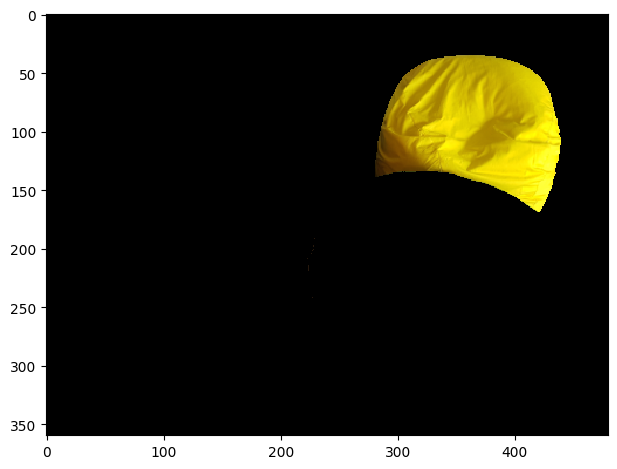

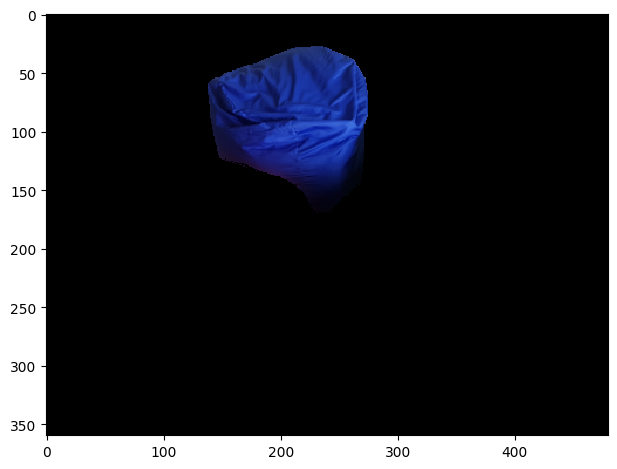

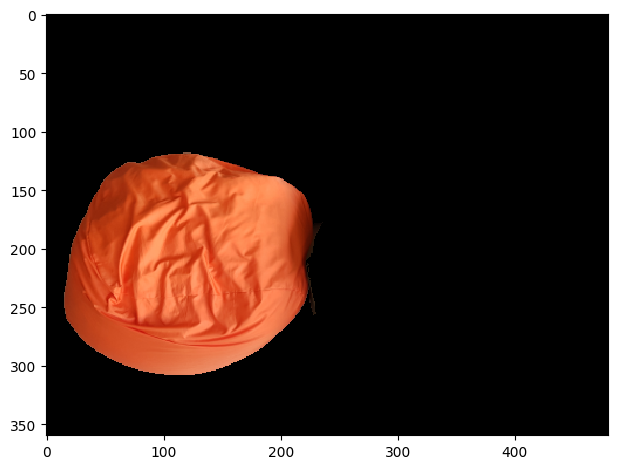

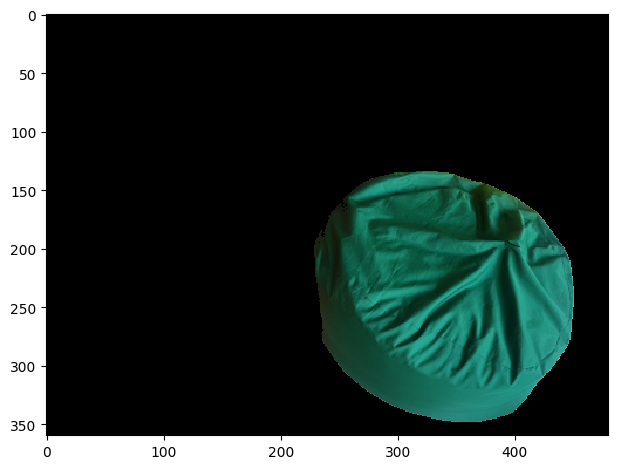

In [71]:
# Yellow
mask2_yellow = upper_mask_yellow*lower_mask_yellow*saturation_mask_yellow
red_yellow = img[:,:,0]*mask2_yellow
green_yellow = img[:,:,1]*mask2_yellow
blue_yellow = img[:,:,2]*mask2_yellow
img_masked_yellow = np.dstack((red_yellow, green_yellow, blue_yellow))
imshow(img_masked_yellow)
plt.show()

# Blue
mask2_blue = upper_mask_blue*lower_mask_blue*saturation_mask_blue
red_blue = img[:,:,0]*mask2_blue
green_blue = img[:,:,1]*mask2_blue
blue_blue = img[:,:,2]*mask2_blue
img_masked_blue = np.dstack((red_blue, green_blue, blue_blue))
imshow(img_masked_blue)
plt.show()

# Blue
mask2_orange = upper_mask_orange*lower_mask_orange*saturation_mask_orange
red_orange = img[:,:,0]*mask2_orange
green_orange = img[:,:,1]*mask2_orange
blue_orange = img[:,:,2]*mask2_orange
img_masked_orange = np.dstack((red_orange, green_orange, blue_orange))
imshow(img_masked_orange)
plt.show()

# Green
mask2_green = upper_mask_green*lower_mask_green*saturation_mask_green
red_green = img[:,:,0]*mask2_green
green_green = img[:,:,1]*mask2_green
blue_green = img[:,:,2]*mask2_green
img_masked_green = np.dstack((red_green, green_green, blue_green))
imshow(img_masked_green)
plt.show()

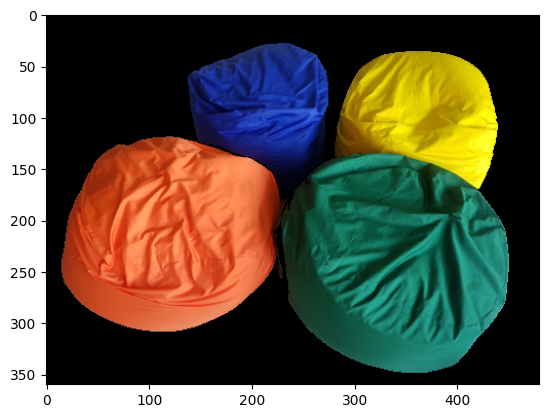

In [72]:
# All bags
img_masked_all = img_masked_yellow | img_masked_blue | img_masked_orange | img_masked_green
plt.imshow(img_masked_all)
plt.show()